
----- Training Models for All Features -----

Logistic Regression Technique Ensemble (All Features) Metrics:
Accuracy: 0.9994936041375606
Precision: 0.9994940517672576
Recall: 0.9994936041375606
F1 Score: 0.9994936040241006


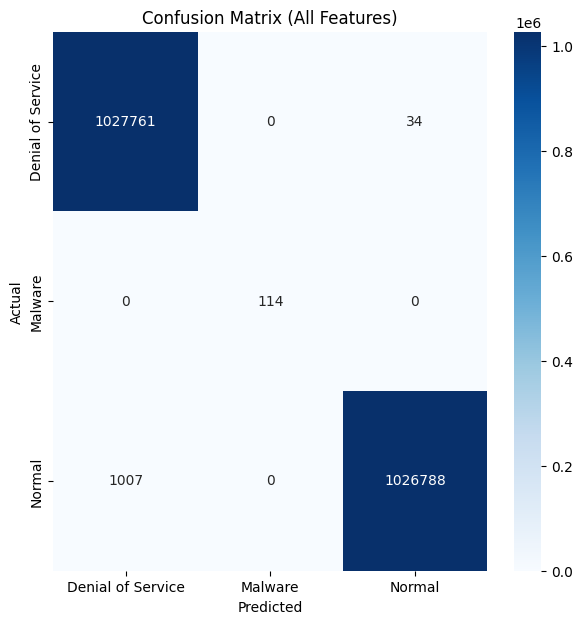


----- Training Models for IG Top 5 Features -----

Logistic Regression Technique Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9042284297739364
Precision: 0.9181018602084026
Recall: 0.9042284297739364
F1 Score: 0.9034272607947432


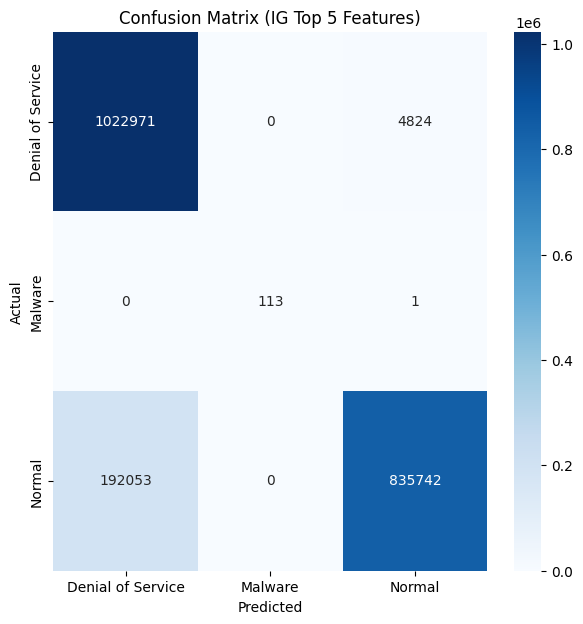


----- Training Models for IG Top 10 Features -----

Logistic Regression Technique Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9941426392126493
Precision: 0.9941708333413676
Recall: 0.9941426392126493
F1 Score: 0.9941425632201216


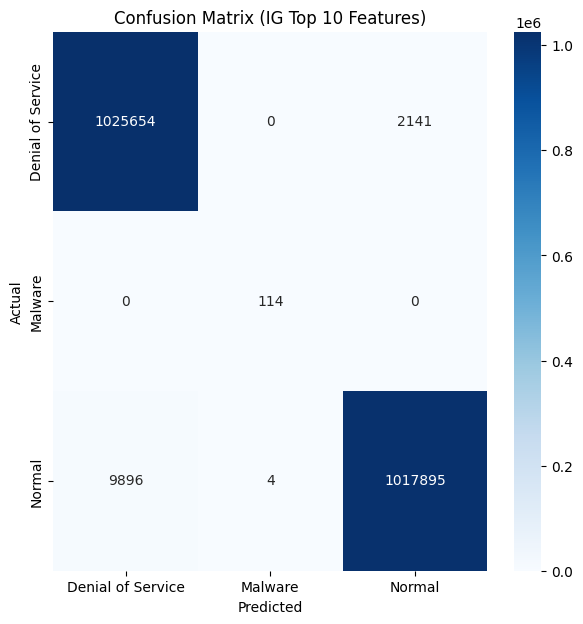


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Technique Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9884244035133463
Precision: 0.9885420949161008
Recall: 0.9884244035133463
F1 Score: 0.9883957125293252


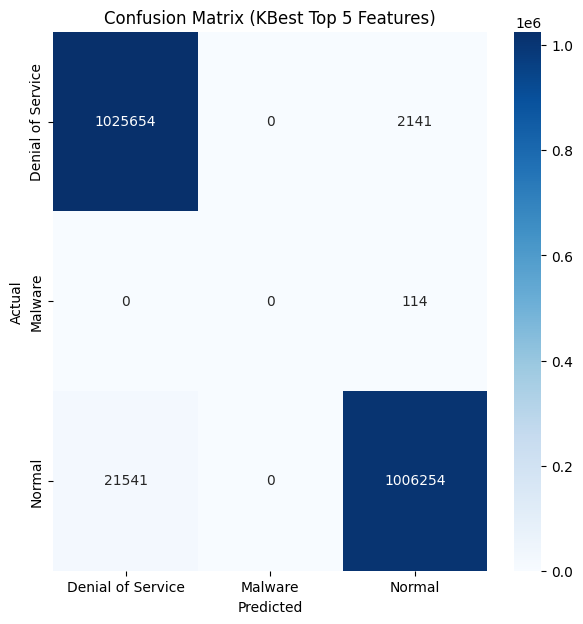


----- Training Models for KBest Top 10 Features -----

Logistic Regression Technique Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9881802049322276
Precision: 0.9883654138203537
Recall: 0.9881802049322276
F1 Score: 0.9881790841203646


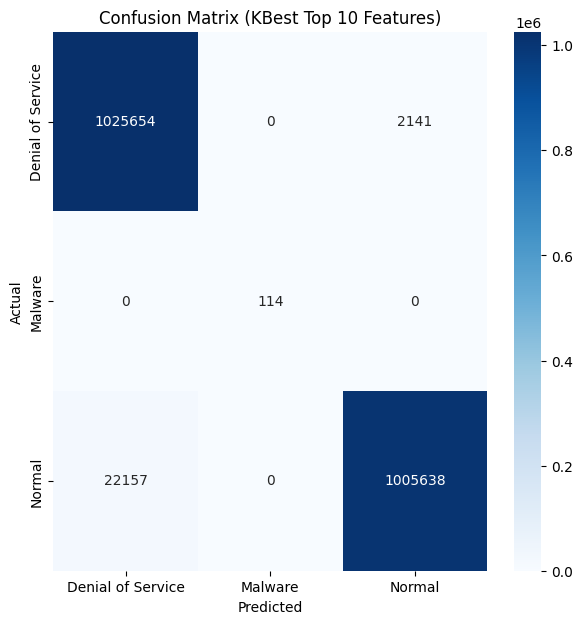

In [2]:

# ---------------------------- Model Training and Evaluation ----------------------------

import time
import sys
from sklearn.linear_model import LogisticRegression
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from Simargl import data_preprocessing, evaluate_model, plot_confusion_matrix



# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")
    
    start_time = time.time()
    model1 = LogisticRegression()

    model1.fit(X_tr, y_train)
    train_end_time = time.time()

    final_predictions = model1.predict(X_te)
    pred_end_time = time.time()


    metrics = evaluate_model(y_test, final_predictions, f"Logistic Regression Technique Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_predictions, le.classes_, f"Confusion Matrix ({name})")


In [3]:
# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Sim_Logistic_Regression_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0  Logistic Regression Technique Ensemble (All Fe...  0.999494   0.999494   
1  Logistic Regression Technique Ensemble (IG Top...  0.904228   0.918102   
2  Logistic Regression Technique Ensemble (IG Top...  0.994143   0.994171   
3  Logistic Regression Technique Ensemble (KBest ...  0.988424   0.988542   
4  Logistic Regression Technique Ensemble (KBest ...  0.988180   0.988365   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.999494  0.999494          48.070731             0.194453       48.265184  
1  0.904228  0.903427          63.022965             0.131584       63.154549  
2  0.994143  0.994143          34.842593             0.102239       34.944832  
3  0.988424  0.988396          26.639087             0.098674       26.737761  
4  0.988180  0.988179          34.830656             0.162121       34.992777  
